In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import us
import unyt as u
import pypsa

In [2]:
url = "https://oedi-data-lake.s3.amazonaws.com/nrel-pds-building-stock/end-use-load-profiles-for-us-building-stock/2021/comstock_tmy3_release_1/timeseries_aggregates/by_puma/state=KS/g20000500-primaryschool.csv"

In [3]:
df = pd.read_csv(url, parse_dates=True, index_col='timestamp')

<Axes: xlabel='timestamp'>

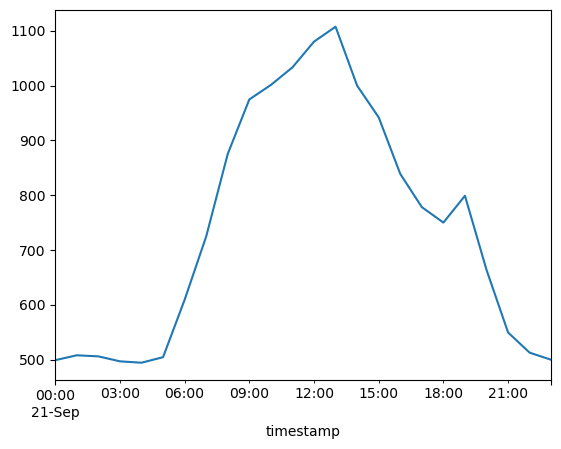

In [4]:
df.loc['2018-09-21','out.electricity.total.energy_consumption'].resample('h').mean().plot()

In [10]:
df['floor_area_represented'].value_counts()

floor_area_represented
3.675263e+06    35040
Name: count, dtype: int64

In [8]:
df.loc[:,'out.electricity.total.energy_consumption'].resample('h').mean().sum()/1e3

6284.266553333334

In [15]:
area_avail = 23291*u.foot**2
area_avail

unyt_quantity(23291, 'ft**2')

In [14]:
kw_per_sqft = ((7.2*u.kW) / (380*u.foot**2))
kw_per_sqft

unyt_quantity(0.01894737, 'kW/ft**2')

In [22]:
kw_per_sqft.to(u.W/u.meter**2) * 0.16

unyt_quantity(32.63164421, 'W/m**2')

In [21]:
1/(2500 * u.hectare/(u.TWh/u.year)).to(u.meter**2/u.W)  # this includes capacity factor!

unyt_quantity(4.5630845, 'W/m**2')